In [323]:
import networkx as nx
import numpy as np
from collections import defaultdict
import random


In [337]:
# setup a random symmetric 2D matrix with 0 diag (a point won't connect it self)
def Make_Question(n):
    G_ori = np.around(np.random.rand(n, n),decimals=3)
    G_final = G_ori - np.diag(np.diag(G_ori))
    Question =  (G_final + G_final.T)/2
    return Question
# ------- Set up our graph -------


                      


In [371]:
long = 3
high = 7
nx, ny = (long, high)
x = np.arange(nx,dtype=float)
y = np.arange(ny,dtype=float)
xv, yv = np.meshgrid(x, y)
print(xv)

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]


In [372]:
print(yv)
type(yv)

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]


numpy.ndarray

In [375]:
Px = np.power(4,-np.abs(xv-long//2)-1)
print(Px)
Py = np.power(4,-np.abs(yv-high//2)-1)
print(Py)
mesh_porbability = np.multiply(Px,Py)
print(np.multiply(Px,Py))
final_probability = np.multiply(Px,Py)/np.sum(mesh_porbability)
print(np.multiply(Px,Py)/np.sum(mesh_porbability))

[[0.0625 0.25   0.0625]
 [0.0625 0.25   0.0625]
 [0.0625 0.25   0.0625]
 [0.0625 0.25   0.0625]
 [0.0625 0.25   0.0625]
 [0.0625 0.25   0.0625]
 [0.0625 0.25   0.0625]]
[[0.00390625 0.00390625 0.00390625]
 [0.015625   0.015625   0.015625  ]
 [0.0625     0.0625     0.0625    ]
 [0.25       0.25       0.25      ]
 [0.0625     0.0625     0.0625    ]
 [0.015625   0.015625   0.015625  ]
 [0.00390625 0.00390625 0.00390625]]
[[0.00024414 0.00097656 0.00024414]
 [0.00097656 0.00390625 0.00097656]
 [0.00390625 0.015625   0.00390625]
 [0.015625   0.0625     0.015625  ]
 [0.00390625 0.015625   0.00390625]
 [0.00097656 0.00390625 0.00097656]
 [0.00024414 0.00097656 0.00024414]]
[[0.00157233 0.00628931 0.00157233]
 [0.00628931 0.02515723 0.00628931]
 [0.02515723 0.10062893 0.02515723]
 [0.10062893 0.40251572 0.10062893]
 [0.02515723 0.10062893 0.02515723]
 [0.00628931 0.02515723 0.00628931]
 [0.00157233 0.00628931 0.00157233]]


In [376]:
print(np.sum(final_probability))


1.0000000000000002


In [383]:
from numpy import random
m = np.int(3.0/4.0*long*high)
print(m)
allocation = np.random.choice(np.arange(long*high), m, replace=False, p = final_probability.flatten())
print(allocation)

15
[ 4 12 10 13 14  7 11  9  8 16  6 18  1  3 15]


[ 4 12 10 13 14  7 11  9  8 16  6 18  1  3 15]
[0 1 1 1 2 1 1 1 1 2 0 2 0 0 2]
[4 5 3 6 0 0 4 2 1 2 6 4 1 3 1]


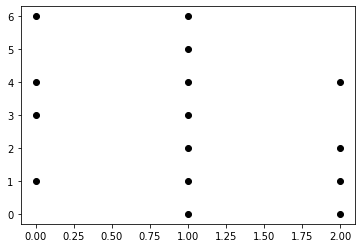

In [389]:
print(allocation)
x = allocation // high
print(x)
y = allocation %  high
print(y)
plt.plot(x, y, 'o', color='black');

In [351]:
vertices = np.vstack((x, y)).T
print(vertices)

[[3 1]
 [1 3]
 [2 2]
 [4 3]
 [1 1]
 [2 3]
 [2 1]
 [3 4]
 [1 2]
 [3 3]
 [3 0]
 [3 2]
 [2 4]
 [2 0]
 [4 0]
 [0 2]
 [0 1]
 [4 2]]


In [352]:
example = vertices[0]
print(example)
print(np.abs(vertices-example))
#print(np.sum(np.abs(vertices-example),axis = 1))
print(np.linalg.norm(np.abs(vertices-example),axis = 1))


#print(np.where(np.sum(np.abs(vertices-example),axis = 1) == 1))
print(np.where(np.linalg.norm(np.abs(vertices-example),axis = 1) < 2))

[3 1]
[[0 0]
 [2 2]
 [1 1]
 [1 2]
 [2 0]
 [1 2]
 [1 0]
 [0 3]
 [2 1]
 [0 2]
 [0 1]
 [0 1]
 [1 3]
 [1 1]
 [1 1]
 [3 1]
 [3 0]
 [1 1]]
[0.         2.82842712 1.41421356 2.23606798 2.         2.23606798
 1.         3.         2.23606798 2.         1.         1.
 3.16227766 1.41421356 1.41421356 3.16227766 3.         1.41421356]
(array([ 0,  2,  6, 10, 11, 13, 14, 17], dtype=int64),)


In [353]:
network = np.zeros((m,m))
for i, vertex in enumerate(vertices):
    example = vertices[i]
    # adjacent option
    index = np.where(np.sum(np.abs(vertices-example),axis = 1) == 1)
    # include diag
    # index = np.where(np.linalg.norm(np.abs(vertices-example),axis = 1) < 2)
    
    network[i][index] = 1

print(network)
network_adv = np.triu(np.pad(network, ((1,0), (1,0)), 'constant', constant_values=(1, 1)),k=1)
print(network_adv)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

(3, 1)
(1, 3)
(2, 2)
(4, 3)
(1, 1)
(2, 3)
(2, 1)
(3, 4)
(1, 2)
(3, 3)
(3, 0)
(3, 2)
(2, 4)
(2, 0)
(4, 0)
(0, 2)
(0, 1)
(4, 2)


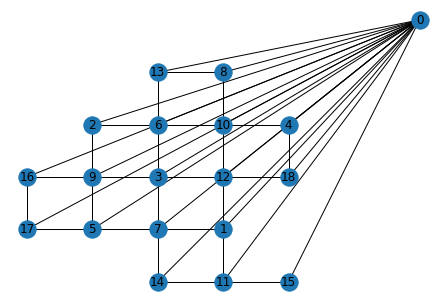

In [355]:
import networkx as nx
G = nx.from_numpy_matrix(network_adv)
pos = {0: (n+1,n)} 
for i, vertex in enumerate(vertices):
    temp_pos = (vertex[0],vertex[1])
    print(temp_pos)
    pos.update({i+1: temp_pos})
   
nx.draw(G,pos,with_labels = True)